6006CEM COURSEWORK - Using machine learning techniques to predict whether a given individual will suffer from a stroke or not.

In [2]:
# Cell 1 - Importing our libraries

import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
# Cell 2 - Importing our DataSet and Preparing the data

# DATASET: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df = pd.read_csv('/Users/surajmann/Coding/Visual Studio/6006CEM/CW/healthcare-dataset-stroke-data.csv') 
print("Keys of dataset:\n", df.keys())  # Display keys 
df.info()                               # Display information on dataset
print("Dataset Shape: ", df.shape)      # Display shape of dataset
df.head()                               # Display first 5 rows of dataset

Keys of dataset:
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Cell 3 - Checking Null values within dataset



Null Values Check: 
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [5]:
# Cell 4 - PreProcessing Dataset

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() # Encodes text into numbers

# Encoding below columns from text to numeric numbers
df['gender'] = label_encoder.fit_transform(df['gender'])                 
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])    
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Given there a 5110 rows and only 201 with NULL values, i have decided to drop all rows with NULL values
df = df.dropna()
print("Null Values Check: \n", df.isnull().any())        # Check there are no longer Null values present

# As ID is irrelevant in terms of training models, we will drop the column
df = df.drop('id', axis=1)

# Display dataset after preprocessing
print("Data Shape: ", df.shape)
df.head()

Null Values Check: 
 id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool
Data Shape:  (4909, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [6]:
# Cell 5 - Checking Unique Values

print("Unique Values Evaluation: \n", df.nunique())

Unique Values Evaluation: 
 gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


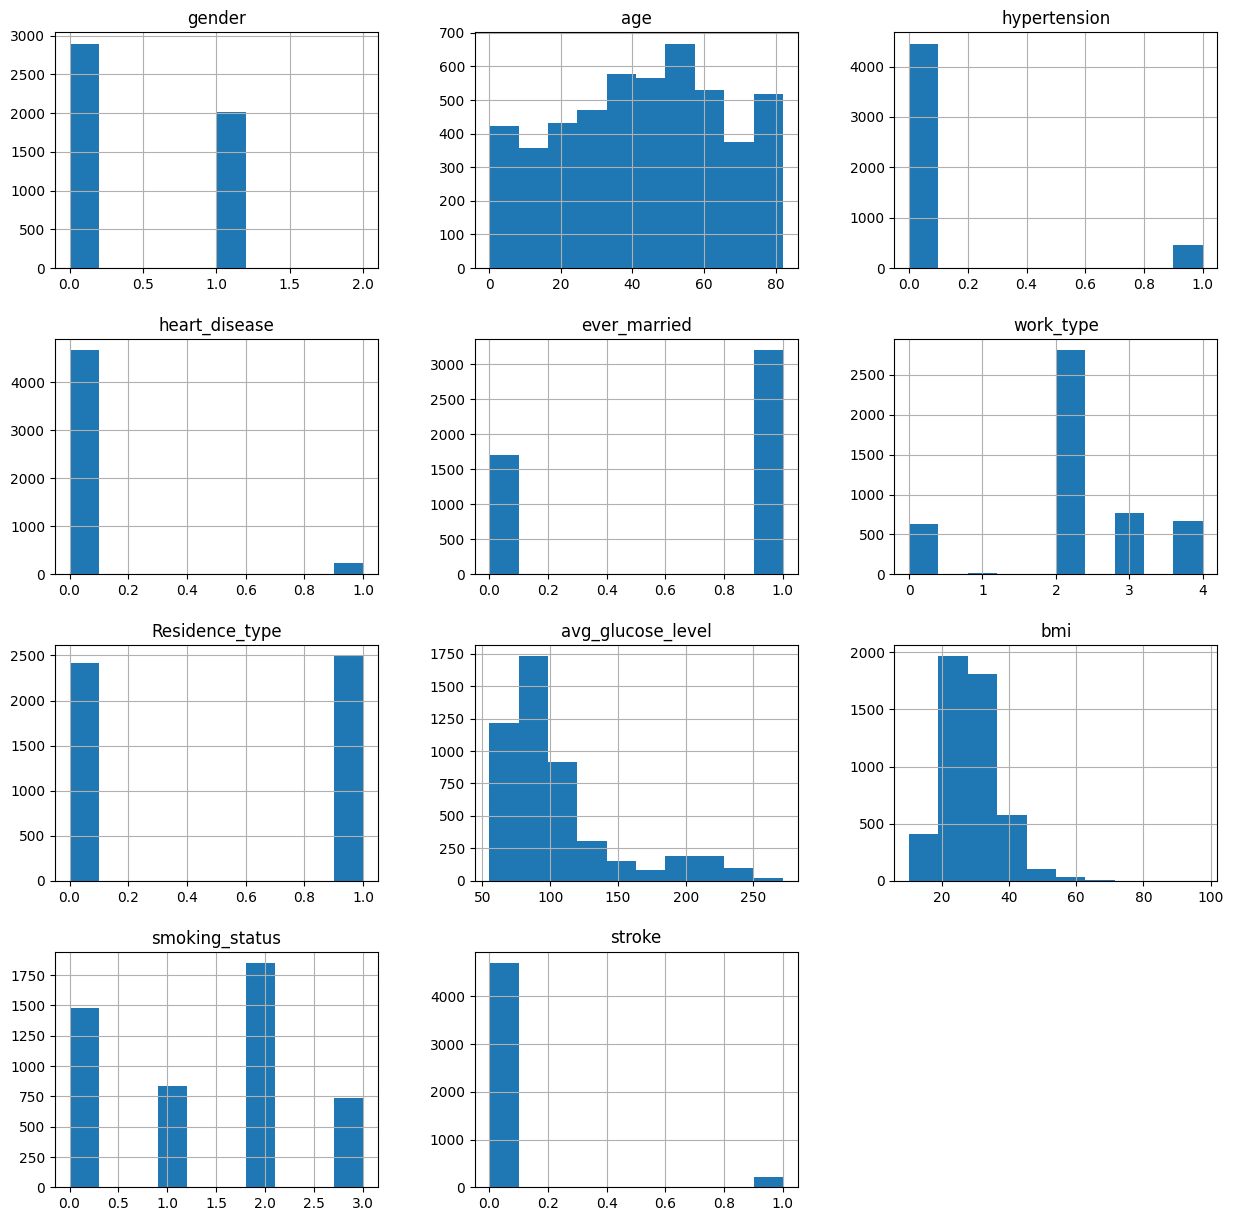

In [7]:
# Cell 6 - Data Visualization - Histogram

df.hist(figsize=(15, 15), alpha=1)
plt.show()

X shape: (4909, 10)
y shape: (4909,)
Prediction Data Balance Check:  0    4700
1     209
Name: stroke, dtype: int64
Prediction Data Balance Check:  1    4700
0    4700
Name: stroke, dtype: int64
X_train shape: (7050, 10)
y_train shape: (7050,)
X_poly_train shape: (7050, 286)
y_poly_test shape: (7050,)


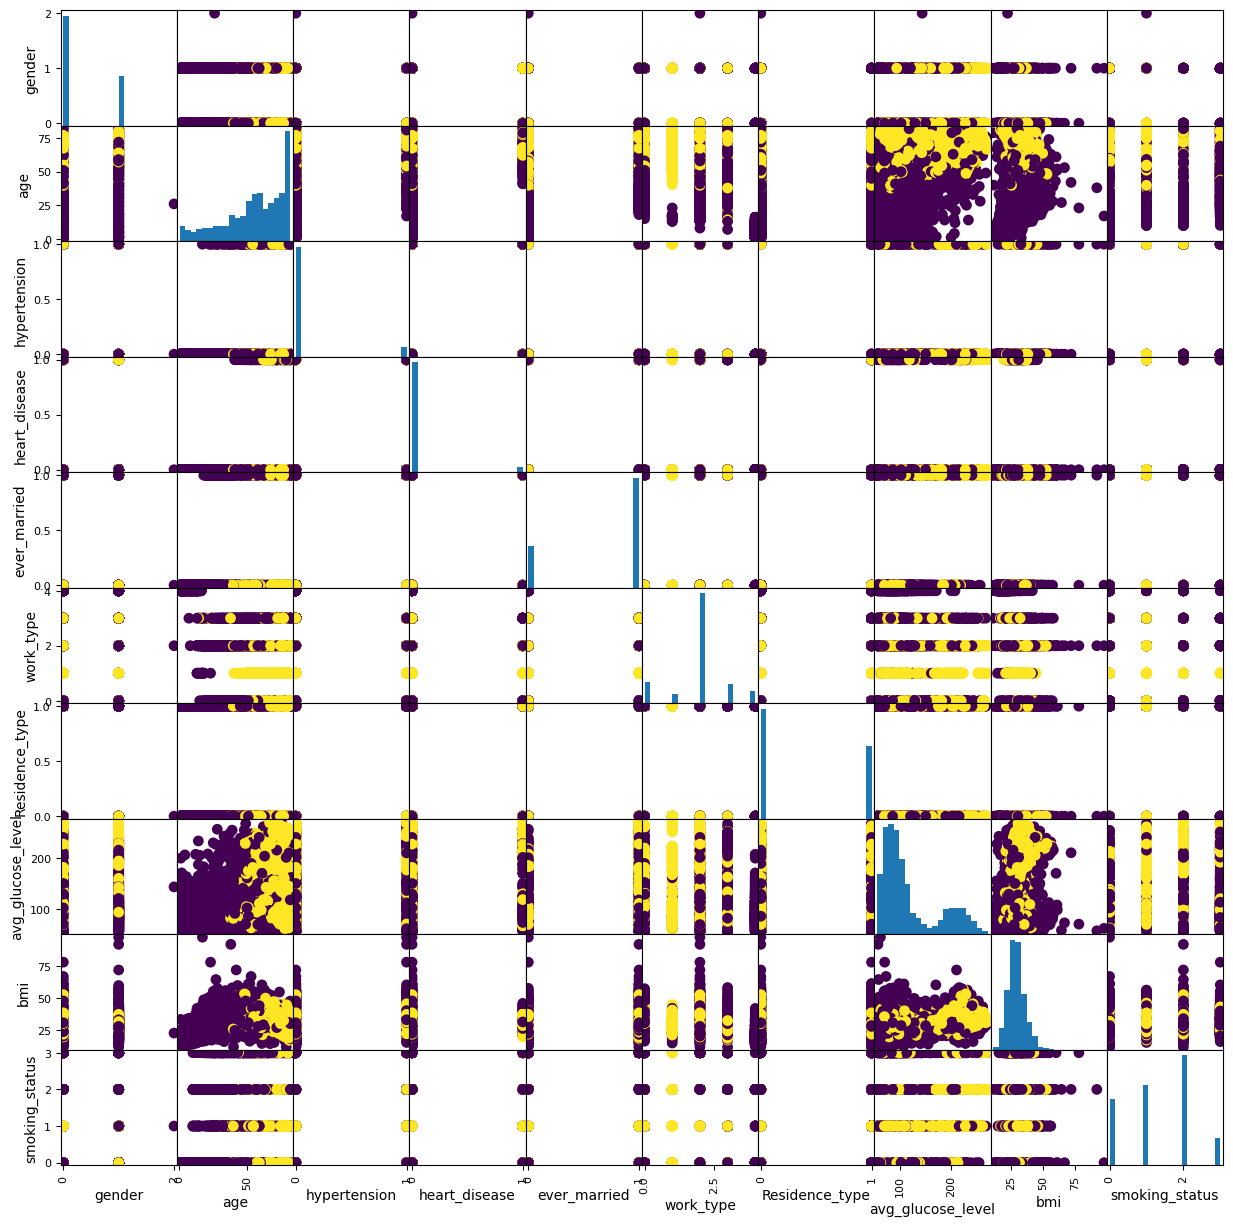

In [8]:
# Cell 7 - Separate and Train the Data
from imblearn.over_sampling import SMOTE

X = df.iloc[:, :-1] # All columns except Stroke column
y = df.iloc[:, -1]  # Just Stroke columns

print("X shape:", X.shape)
print("y shape:", y.shape)

# Check target data for imbalance
print("Prediction Data Balance Check: ", y.value_counts())

# Imbalance present, using SMOTE to rectify imbalance in Y
oversampled = SMOTE(random_state=0)
X_smote, y_smote = oversampled.fit_resample(X, y)

# Check if imbalance has been rectified
print("Prediction Data Balance Check: ", y_smote.value_counts())

# Import train and test split for readying our data for modelling
from sklearn.model_selection import train_test_split # split data for 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.25, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Visualize the data - Scatter Matrix
pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15, 15),
                          marker='o', hist_kwds={'bins': 20}, s=60,
                          alpha=1)


#  Making use of polynomial features and feature scaling to enhance data for training
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
sc = StandardScaler()
poly_features = PolynomialFeatures(degree=3)
X_poly_pre = poly_features.fit_transform(X_smote)       # Polynomial features for X
X_poly = sc.fit_transform(X_poly_pre)                   # Scale polynomial X
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_smote, test_size = 0.25, random_state=0)

print("X_poly_train shape:", X_poly_train.shape)
print("y_poly_test shape:", y_poly_train.shape)

In [9]:
# Cell 8 - Creating a model function

def FitandTest(model):                                          # Take model as input
    model.fit(X_train, y_train)                                 # Fit training data to model
    score = model.score(X_train,y_train)                        # Analyse training data model score
    print("Training Score: {:.3f}".format(score))
    score = model.score(X_test,y_test)                          # Analyse testing data model score
    print("Testing Score: {:.3f}".format(score))
    model.fit(X_poly_train, y_poly_train)                       # Fit training data to model
    score = model.score(X_poly_train, y_poly_train)             # Analyse training data model score
    print("Poly Training Score: {:.3f}".format(score))
    score = model.score(X_poly_test,y_poly_test)                # Analyse testing data model score
    print("Poly Testing Score: {:.3f}".format(score))
    return model                                                # Returns updated model from Polynomial features

In [10]:
# Cell 9 - New Model Function for Tuning - GridSearch
from sklearn.model_selection import GridSearchCV

def FitandTune_G(model, parameters):        # Takes the model and hyperparameters as input
    print("\nGrid Search: ")
    
    # Apply GridSearch on model and given hyperparameters
    grid = GridSearchCV(model, parameters, cv=5, scoring = 'accuracy', return_train_score=False)
    grid.fit(X_poly_train, y_poly_train)

    pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]

    # showing best model accuracy
    # showing optimal parameters from grid search for each given model
    print("The best model accuracy: {:.3f}".format(grid.best_score_))
    print("Optimal hyperparameter values:", grid.best_params_)

In [11]:
# Cell 10 - New Model Function for Tuning - Randomized Search
from sklearn.model_selection import RandomizedSearchCV

def FitandTune_R(model, parameters):        # Takes the model and hyperparameters as input
    print("\nRandomized Search: ")

    # Apply RandomizedSearch on model and given hyperparameters
    rand = RandomizedSearchCV(model, parameters, cv=5, scoring = 'accuracy', return_train_score=False, n_iter=2)
    rand.fit(X_poly_train, y_poly_train)

    pd.DataFrame(rand.cv_results_)[['mean_test_score', 'params']]

    # showing best model accuracy
    # showing optimal parameters from randomized search for each given model
    print("The best model accuracy: {:.3f}".format(rand.best_score_))
    print("Optimal hyperparameter values:", rand.best_params_)

In [12]:
# Cell 11 - Evaluation with Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def confusion(trained_model):
    print("\nConfusion Matrix: ")
    y_test_pred = trained_model.predict(X_poly_test)            # Predict y values from model using our polynomial X test data
    cfm = confusion_matrix(y_poly_test, y_test_pred)            # Apply Confusion Matrix on y_poly_test data and predicted y values
    sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues')         # Display comparison of test y vs predicted y

In [14]:
# Cell 12 - Evaluation with Classification Report
from sklearn.metrics import classification_report

def classification(trained_model):                          # Take trained model as input
    print("\nClassification Report: ")
    y_test_pred = trained_model.predict(X_poly_test)        # Predict Y using polynomial y test data
    target_names = ['No Stroke', 'Stroke']
    print(classification_report(y_poly_test, y_test_pred, target_names=target_names)) # Produce classification report

In [15]:
# Cell 13 - Evaluation with CrossValidation Score

from sklearn.model_selection import cross_val_score

def cross(trained_model):
    print("\nCross Validation Score: ")
    scores = cross_val_score(trained_model, X_poly, y_smote, cv=5, scoring='accuracy')
    print("Accuracy: ", scores)
    print("Average: {:.3f}".format(scores.mean()))

Training Score: 0.798
Testing Score: 0.811
Poly Training Score: 0.868
Poly Testing Score: 0.858

Grid Search: 
The best model accuracy: 0.861
Optimal hyperparameter values: {'C': 10, 'max_iter': 30, 'solver': 'liblinear'}

Randomized Search: 
The best model accuracy: 0.858
Optimal hyperparameter values: {'solver': 'liblinear', 'max_iter': 11, 'C': 10}

Classification Report: 
              precision    recall  f1-score   support

   No Stroke       0.89      0.82      0.85      1188
      Stroke       0.83      0.90      0.86      1162

    accuracy                           0.86      2350
   macro avg       0.86      0.86      0.86      2350
weighted avg       0.86      0.86      0.86      2350


Cross Validation Score: 
Accuracy:  [0.8106383  0.85585106 0.86223404 0.87234043 0.875     ]
Average: 0.855

Confusion Matrix: 


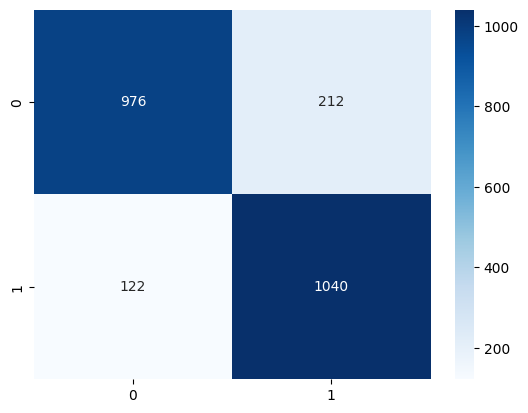

In [72]:
# Cell 14 - Creating Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)          # Creating Logistic Regression Model
trained_model_LG = FitandTest(model)                # Sending Model to Model function

# HyperParameters to be used for GridSearch and RandomSearch
parameters = { 'solver' : ['netwon-cg.', 'lbfgs', 'liblinear'],
                'max_iter' : list(range(1, 31)),
                'C' : [100, 10, 1.0, 0.1, 0.01]}

# Work functions on other Models and evaluations
FitandTune_G(model, parameters)
FitandTune_R(model, parameters)
classification(trained_model_LG)
cross(model)
confusion(trained_model_LG)

Training Score: 0.841
Testing Score: 0.852
Poly Training Score: 0.951
Poly Testing Score: 0.916

Grid Search: 
The best model accuracy: 0.874
Optimal hyperparameter values: {'activation': 'tanh', 'alpha': 0.0001, 'max_iter': 30, 'solver': 'adam'}

Randomized Search: 
The best model accuracy: 0.861
Optimal hyperparameter values: {'solver': 'adam', 'max_iter': 18, 'alpha': 0.001, 'activation': 'relu'}

Classification Report: 
              precision    recall  f1-score   support

   No Stroke       0.95      0.88      0.91      1188
      Stroke       0.89      0.95      0.92      1162

    accuracy                           0.92      2350
   macro avg       0.92      0.92      0.92      2350
weighted avg       0.92      0.92      0.92      2350


Cross Validation Score: 
Accuracy:  [0.87446809 0.90851064 0.92074468 0.91702128 0.91489362]
Average: 0.907

Confusion Matrix: 


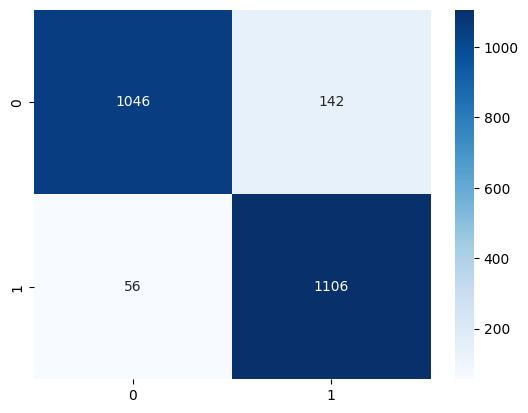

In [73]:
# Cell 15 - Create Neural Network Model
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)   # Create MLP Model
trained_model_MLP = FitandTest(model)

# HyperParameters to be used for GridSearch and RandomSearch
parameters = { 'activation' : ['logistic', 'tanh', 'relu'],
                'max_iter' : list(range(1, 31)),
                'solver' : ['lbfgs', 'sgd', 'adam'],
                'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Work functions on other Models and evaluations
FitandTune_G(model, parameters)
FitandTune_R(model, parameters)
classification(trained_model_MLP)
cross(model)
confusion(trained_model_MLP)

Training Score: 0.919
Testing Score: 0.892
Poly Training Score: 0.918
Poly Testing Score: 0.889

Grid Search: 
The best model accuracy: 0.907
Optimal hyperparameter values: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

Randomized Search: 
The best model accuracy: 0.891
Optimal hyperparameter values: {'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'kd_tree'}

Classification Report: 
              precision    recall  f1-score   support

   No Stroke       0.95      0.82      0.88      1188
      Stroke       0.84      0.96      0.89      1162

    accuracy                           0.89      2350
   macro avg       0.90      0.89      0.89      2350
weighted avg       0.90      0.89      0.89      2350


Cross Validation Score: 
Accuracy:  [0.84840426 0.89361702 0.88138298 0.89521277 0.90478723]
Average: 0.885

Confusion Matrix: 


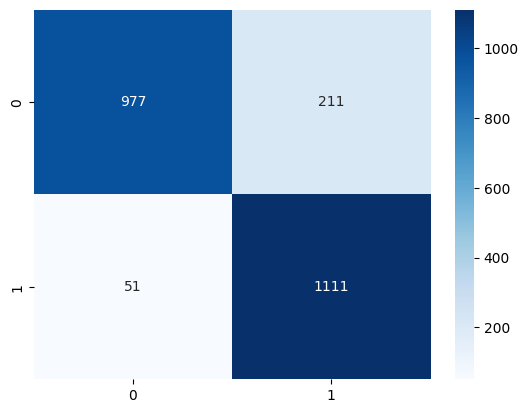

In [74]:
# Cell 16 - Create KNeighbours Model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)     # Create KNeighbors Model
trained_model_K = FitandTest(model)

# HyperParameters to be used for GridSearch and RandomSearch
parameters = { 'n_neighbors' : list(range(1,10)), 
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Work functions on other Models and evaluations
FitandTune_G(model, parameters)
FitandTune_R(model, parameters)
classification(trained_model_K)
cross(model)
confusion(trained_model_K)

Training Score: 0.771
Testing Score: 0.773
Poly Training Score: 0.869
Poly Testing Score: 0.862

Grid Search: 
The best model accuracy: 0.649
Optimal hyperparameter values: {'C': 100, 'kernel': 'linear', 'max_iter': 29}

Randomized Search: 
The best model accuracy: 0.504
Optimal hyperparameter values: {'max_iter': 11, 'kernel': 'poly', 'C': 1.0}

Classification Report: 
              precision    recall  f1-score   support

   No Stroke       0.90      0.81      0.86      1188
      Stroke       0.83      0.91      0.87      1162

    accuracy                           0.86      2350
   macro avg       0.86      0.86      0.86      2350
weighted avg       0.87      0.86      0.86      2350


Cross Validation Score: 
Accuracy:  [0.81914894 0.85265957 0.8643617  0.87021277 0.86755319]
Average: 0.855

Confusion Matrix: 


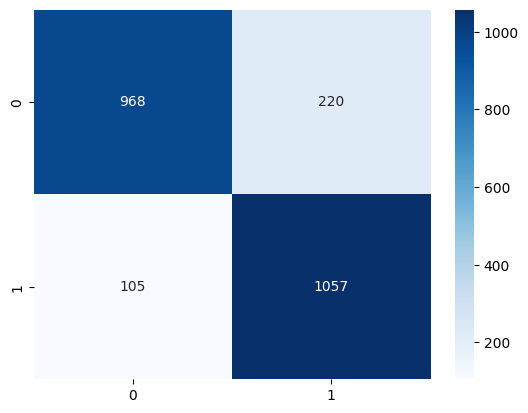

In [16]:
# Cell 17 - Create SVC Model
from sklearn.svm import SVC

model = SVC()                       # Create SVC Model
trained_model_SVC = FitandTest(model)

# HyperParameters to be used for GridSearch and RandomSearch
parameters = { 'C' : [100, 10, 1.0, 0.1, 0.01],
                'max_iter' : list(range(1, 31)),
                'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']}

# Work functions on other Models and evaluations
FitandTune_G(model, parameters)
FitandTune_R(model, parameters)
classification(trained_model_SVC)
cross(model)
confusion(trained_model_SVC)